# Predicting Fraudulent Loans Applications

According to the American Bankers Association, [_"every dollar of fraud now costs banks and credit unions roughly $2.92"_](https://www.aba.com/member-tools/industry-solutions/insights/state-card-fraud-2018), that's a reason why predicting fraud using machine learning techniques becomes a [broad area of research](https://scholar.google.com.mx/scholar?q=fraud+detection+machine+learning&btnG=&oq=fraud+detection+) and a great [business opportunity for FinTech startups](https://www.eu-startups.com/2019/06/paris-based-fintech-bleckwen-raises-e8-8-million-for-its-fraud-detection-software-to-prevent-financial-crime/).

In this activity, we are going to explore how tree based algorithms can be used to identify fraudulent loan applications. We will start using a decision tree model, that will be trained with the `sba_loans_encoded.csv` file that was created before.

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [13]:
# Loading data
file_path = Path('../Resources/sba_loans_encoded.csv')
df_loans = pd.read_csv(file_path)
df_loans.head()

,Unnamed: 0,Year,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,0,2001,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2001,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2001,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2003,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2006,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [15]:
# Define features set
X=df_loans.drop('Default', axis=1)

Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [18]:
# Define target vector
y=df_loans.Default.values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

Split the data into training and testing sets.

In [19]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [21]:
# Create the StandardScaler instance
std_scaler = StandardScaler()

# Fit the Standard Scaler with the training data
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
# Scale the training data
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled= std_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [25]:
# Create the decision tree classifier instance
dTree_clf =  tree.DecisionTreeClassifier()

# Fit the model
model = dTree_clf.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [26]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)


## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [27]:
# Calculating the confusion matrix
c_matrix=pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

#create classification Report
clf_report = classification_report(y_test, predictions)

In [28]:
# Displaying results
print(c_matrix)
print("\nAccuracy Score of the Decision Tree Model is: " + f'{acc_score}' +"\n")
print(clf_report)


          Predicted_0  Predicted_1
Actual_0          318           26
Actual_1           25          156

Accuracy Score of the Decision Tree Model is: 0.9028571428571428

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       344
           1       0.86      0.86      0.86       181

    accuracy                           0.90       525
   macro avg       0.89      0.89      0.89       525
weighted avg       0.90      0.90      0.90       525



## Visualizing the Decision Tree

lets create a visual representation of the decision tree using `pydotplus` and plot the graph on the notebook, and also save it in `PDF` and `PNG` formats.

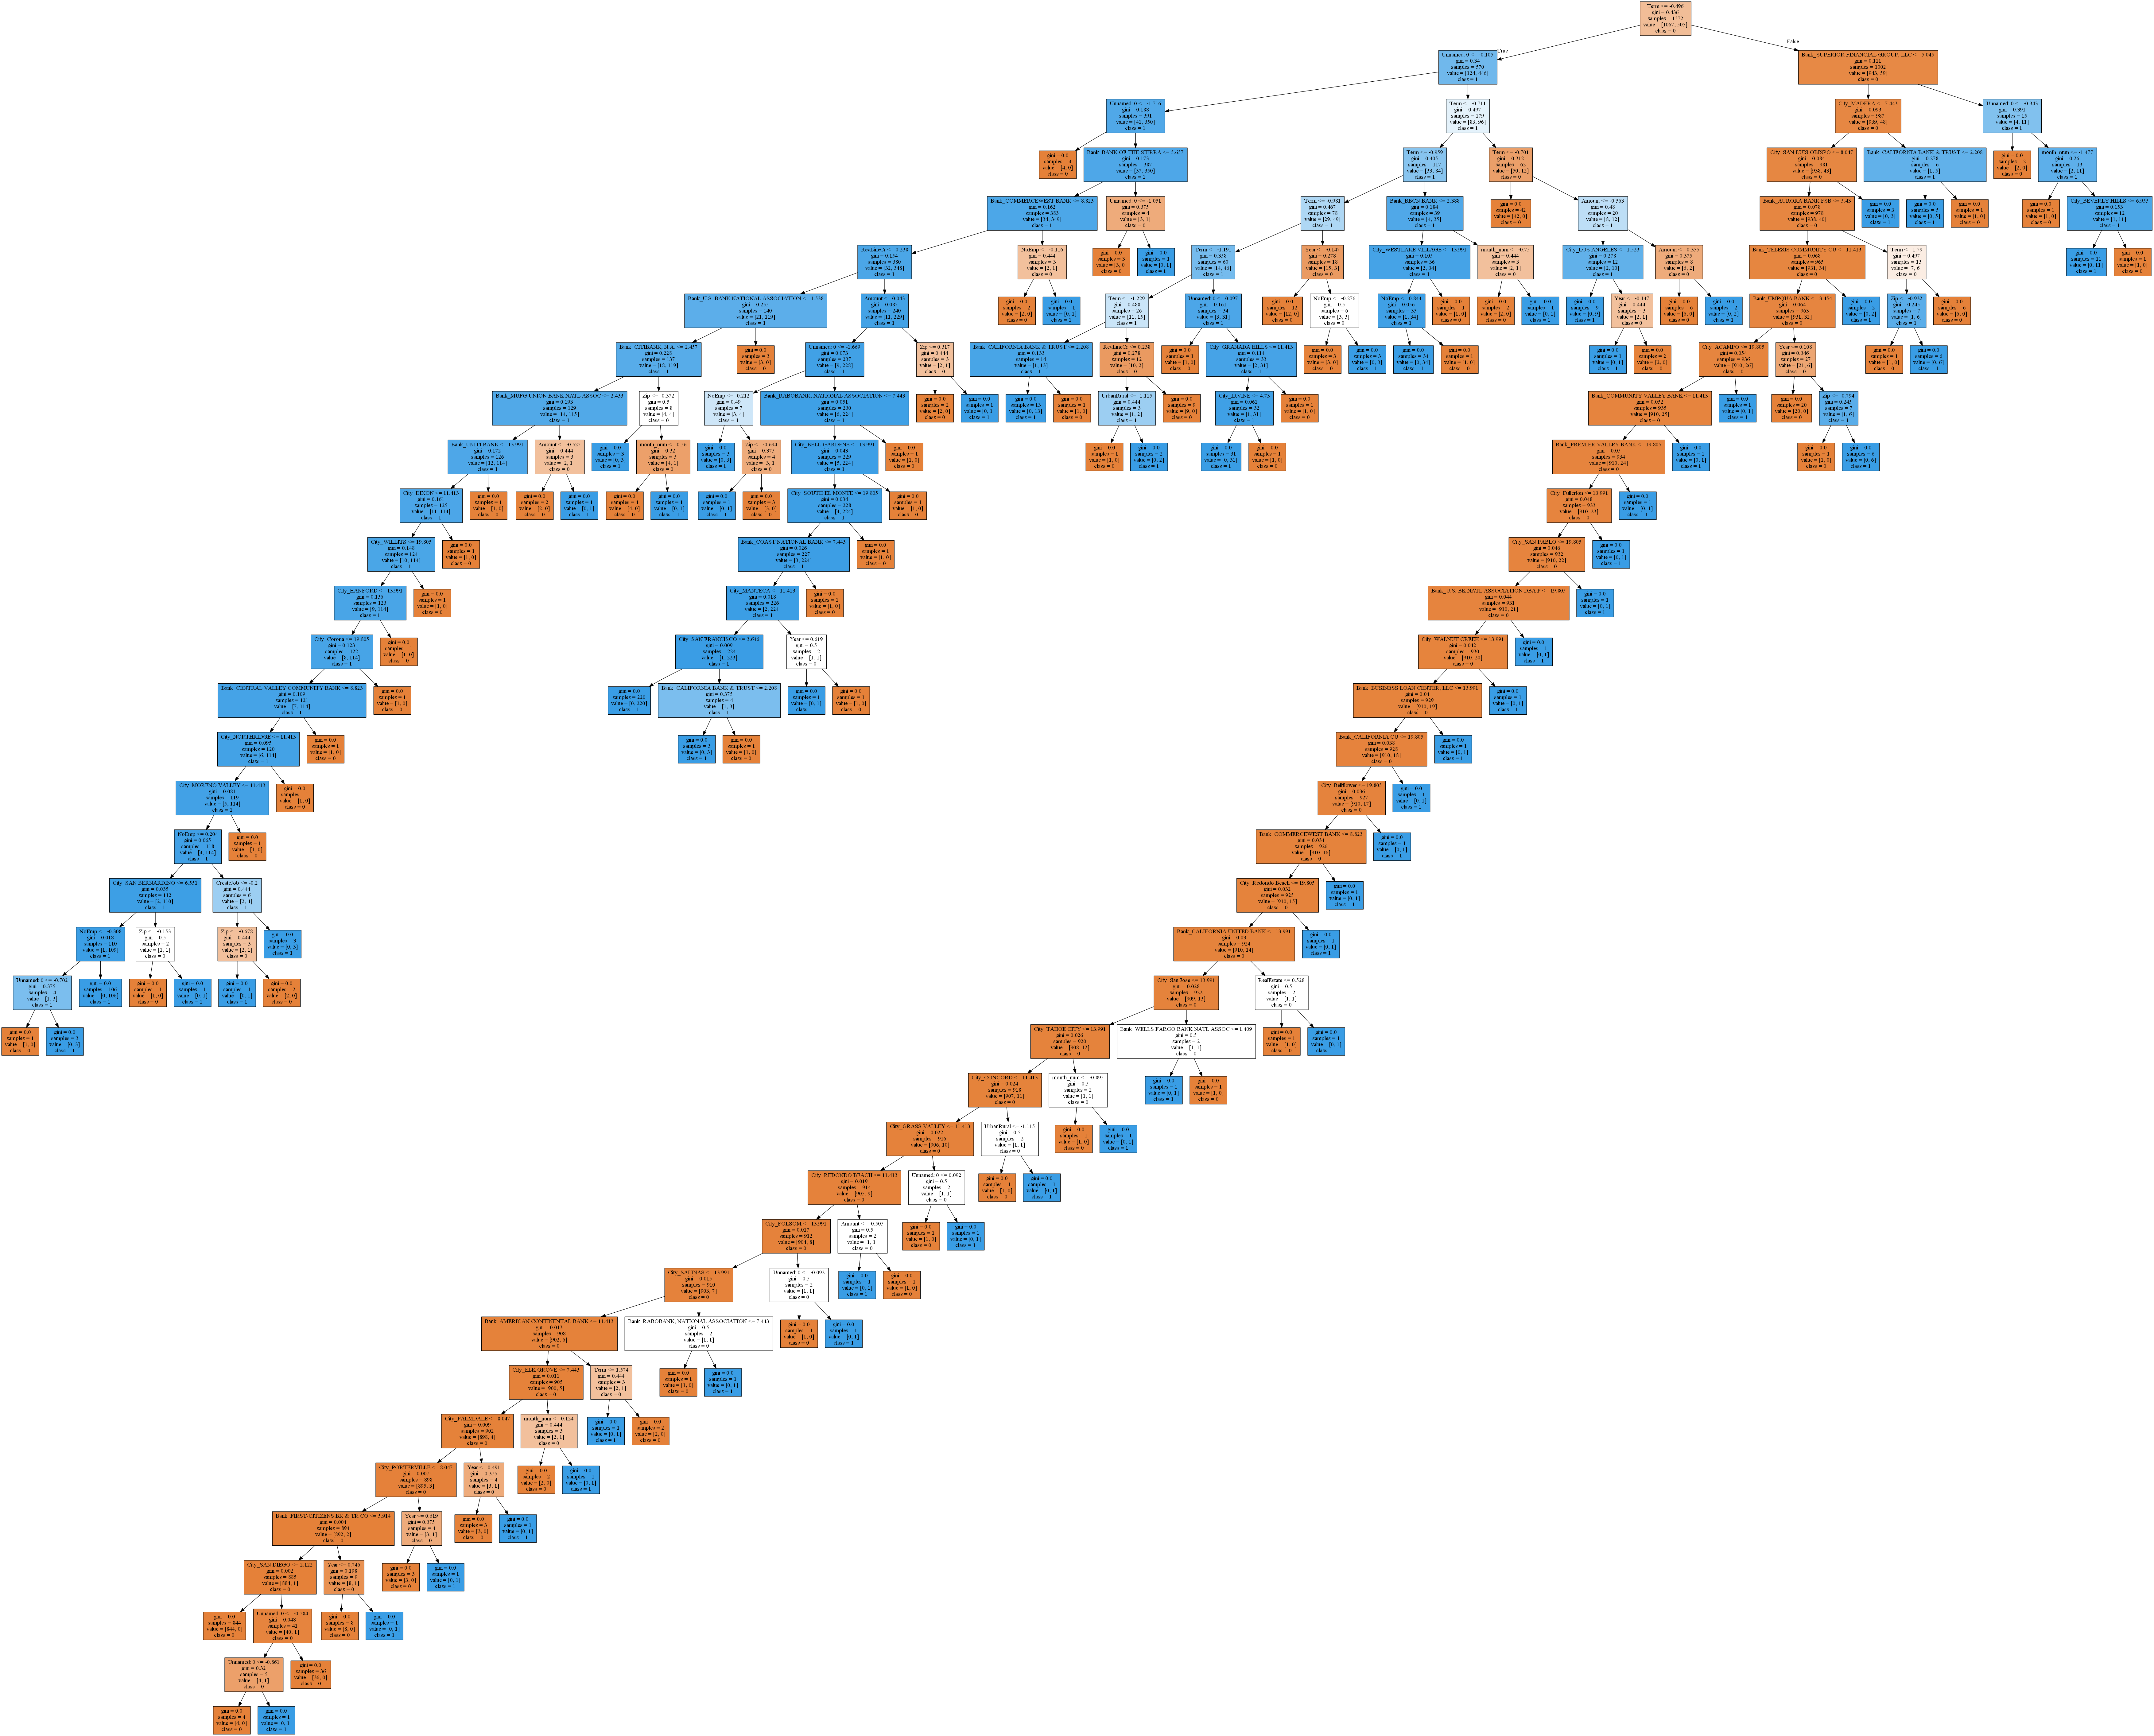

In [29]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [30]:
# Saving the tree as PDF
file_path = ("../Resources/sba_loans_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("../Resources/sba_loans_tree.png")
graph.write_png(file_path)



True

## Analysis Question

Finally, analyze the model's evaluation results and lets answer the following question.

* Would you trust in this model to deploy a loans application approval solution in a bank?

From the Model accuracy, precision and Recall scores it appears the model is performing pretty well against both insample and out of sample data. Hypothtically speaking, this is a pretty good model to be used in realtime situations however, we need to test the reliability of the model based on multiple data sets before concluding that this is a right model to be employed for loan approvals.